<a href="https://colab.research.google.com/github/lakshya324/MLCOE-Task-2/blob/main/task2_1_Regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLCOE Task 2.1 - Regression
$\textrm{Lakshya Sharma} $

## Step 1 - Data Preprocessing

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Importing Dataset

In [3]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,38.000000,32.000000,50.000000,50.000000
mean,84471.755526,124460.951250,211025.097800,112012.639200
std,47140.937802,24360.580496,122290.310726,40306.180338
min,0.000000,51743.150000,0.000000,14681.400000
25%,65716.990000,113049.002500,129300.132500,90138.902500
50%,82404.585000,125604.625000,212716.240000,107978.190000
75%,120392.700000,145190.700000,299469.085000,139765.977500
max,165349.200000,157693.920000,471784.100000,192261.830000


In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.shape

(50, 5)

### One-Hot Encoding

In [9]:
df_encoded = pd.get_dummies(df, columns=['State'], prefix='',prefix_sep='',dtype=float)
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [10]:
df_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [11]:
df_encoded['Profit'], df_encoded['New York'] = df_encoded['New York'].copy(), df_encoded['Profit'].copy()
df_refined=df_encoded.rename(columns={'Profit': 'New York', 'New York': 'Profit'})

In [12]:
df_refined.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.20,136897.80,471784.10,1.0,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,0.0,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,1.0,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,1.0,166187.94


In [13]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   New York         50 non-null     float64
 4   California       50 non-null     float64
 5   Florida          50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [14]:
correlation_matrix = df_refined.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
R&D Spend,1.000000,0.162234,0.745607,0.064749,-0.165154,0.097069,0.976569
Administration,0.162234,1.000000,-0.024572,-0.150790,0.180690,-0.030638,0.131789
Marketing Spend,0.745607,-0.024572,1.000000,-0.033670,-0.168875,0.205685,0.747766
New York,0.064749,-0.150790,-0.033670,1.000000,-0.515152,-0.492366,0.031368
California,-0.165154,0.180690,-0.168875,-0.515152,1.000000,-0.492366,-0.145837
Florida,0.097069,-0.030638,0.205685,-0.492366,-0.492366,1.000000,0.116244
Profit,0.976569,0.131789,0.747766,0.031368,-0.145837,0.116244,1.000000


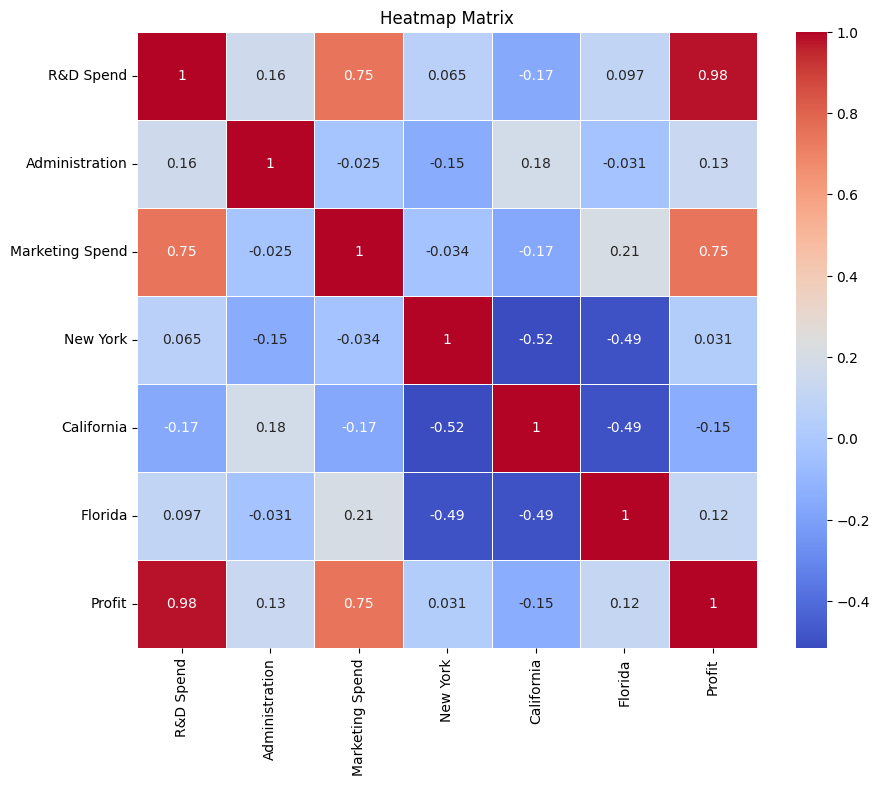

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Matrix')
plt.show()

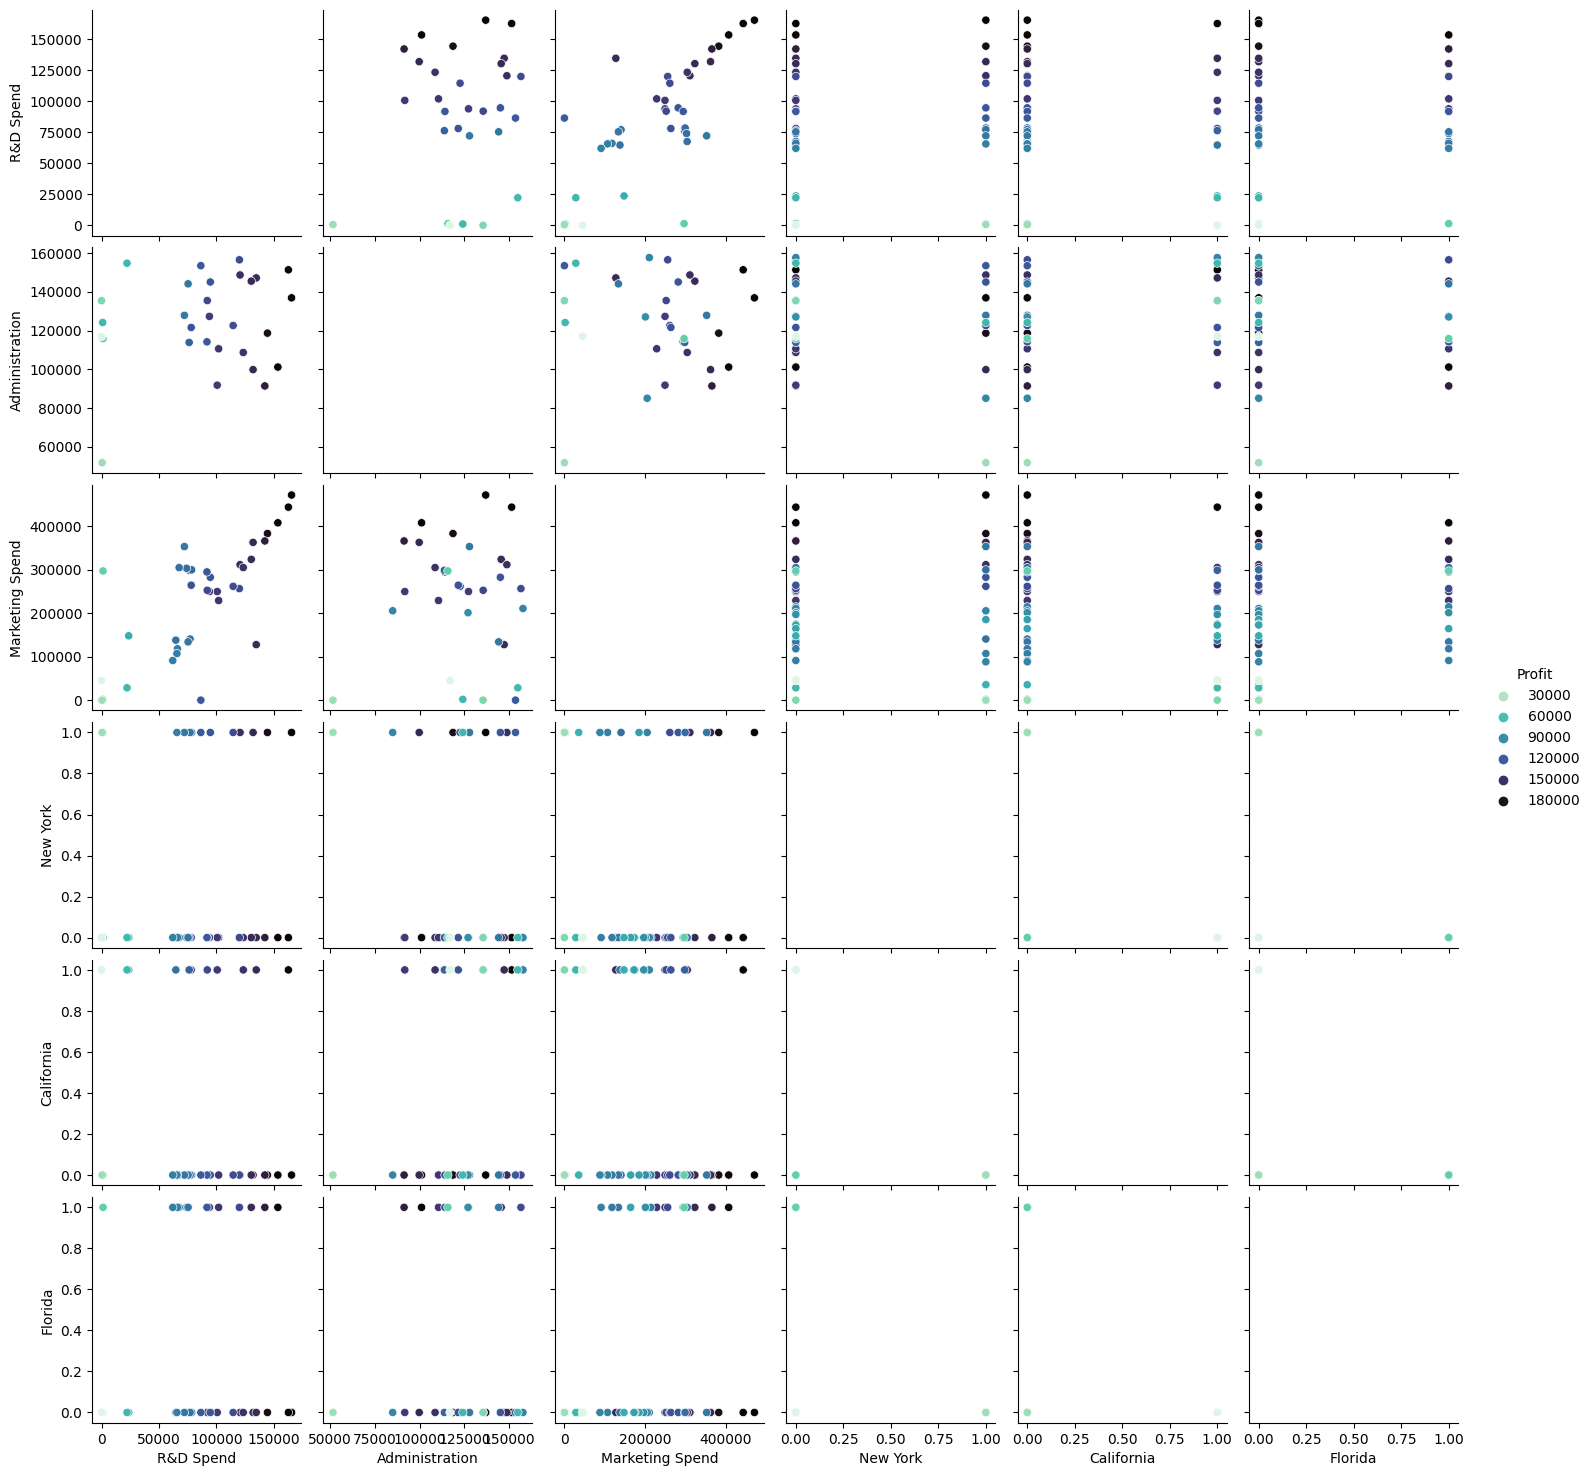

In [16]:
sns.pairplot(df_refined,hue='Profit',palette="mako_r")
plt.show()

### Missing Values

In [17]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   New York         50 non-null     float64
 4   California       50 non-null     float64
 5   Florida          50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [18]:
df_refined.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
New York            0
California          0
Florida             0
Profit              0
dtype: int64

#### R&D Spend Column

In [19]:
df_refined['R&D Spend'] = df_refined.groupby('New York')['R&D Spend'].transform(lambda x: x.fillna(x.mean()))
df_refined['R&D Spend'] = df_refined.groupby('California')['R&D Spend'].transform(lambda x: x.fillna(x.mean()))
df_refined['R&D Spend'] = df_refined.groupby('Florida')['R&D Spend'].transform(lambda x: x.fillna(x.mean()))

In [20]:
df_refined.isnull().sum()

R&D Spend           0
Administration     18
Marketing Spend     0
New York            0
California          0
Florida             0
Profit              0
dtype: int64

#### Administration Column

In [21]:
df_refined['Administration'] = df_refined.groupby('New York')['Administration'].transform(lambda x: x.fillna(x.mean()))
df_refined['Administration'] = df_refined.groupby('California')['Administration'].transform(lambda x: x.fillna(x.mean()))
df_refined['Administration'] = df_refined.groupby('Florida')['Administration'].transform(lambda x: x.fillna(x.mean()))

In [22]:
df_refined.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
New York           0
California         0
Florida            0
Profit             0
dtype: int64

In [23]:
df_refined

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.200000,136897.800000,471784.10,1.0,0.0,0.0,192261.83
1,162597.700000,151377.590000,443898.53,0.0,1.0,0.0,191792.06
2,153441.510000,101145.550000,407934.54,0.0,0.0,1.0,191050.39
3,144372.410000,118671.850000,383199.62,1.0,0.0,0.0,182901.99
4,142107.340000,91391.770000,366168.42,0.0,0.0,1.0,166187.94
5,131876.900000,99814.710000,362861.36,1.0,0.0,0.0,156991.12
6,134615.460000,147198.870000,127716.82,0.0,1.0,0.0,156122.51
7,130298.130000,145530.060000,323876.68,0.0,0.0,1.0,155752.60
8,120542.520000,148718.950000,311613.29,1.0,0.0,0.0,152211.77
9,123334.880000,108679.170000,304981.62,0.0,1.0,0.0,149759.96


In [24]:
correlation_matrix = df_refined.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
R&D Spend,1.000000,0.128677,0.695159,0.074113,-0.152250,0.079348,0.910322
Administration,0.128677,1.000000,-0.014053,-0.186817,0.177308,0.009657,0.118531
Marketing Spend,0.695159,-0.014053,1.000000,-0.033670,-0.168875,0.205685,0.747766
New York,0.074113,-0.186817,-0.033670,1.000000,-0.515152,-0.492366,0.031368
California,-0.152250,0.177308,-0.168875,-0.515152,1.000000,-0.492366,-0.145837
Florida,0.079348,0.009657,0.205685,-0.492366,-0.492366,1.000000,0.116244
Profit,0.910322,0.118531,0.747766,0.031368,-0.145837,0.116244,1.000000


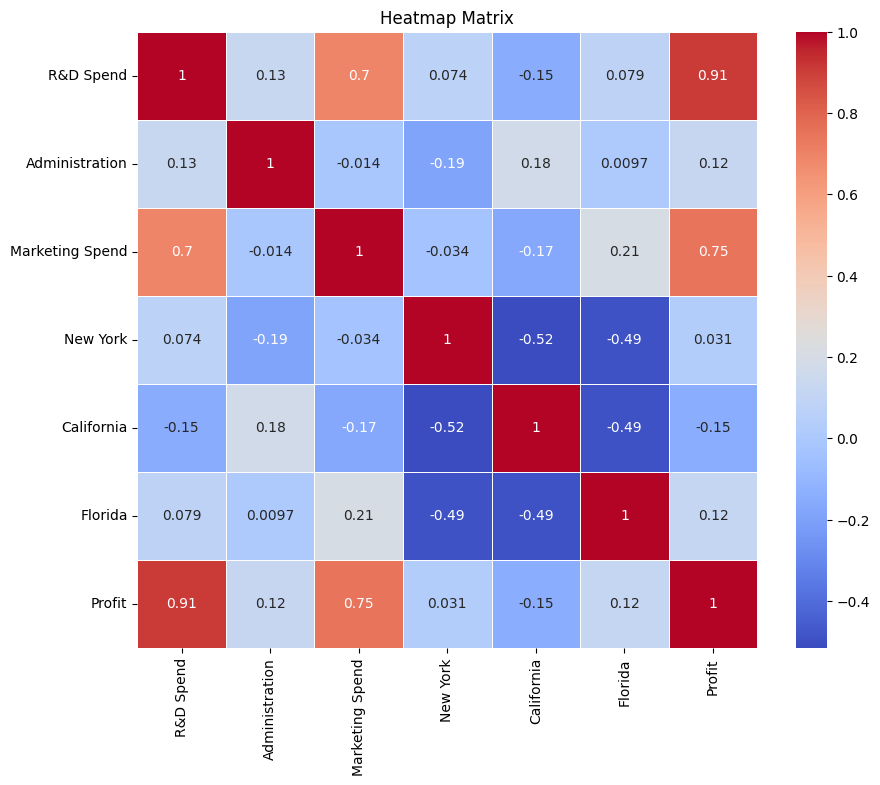

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Matrix')
plt.show()

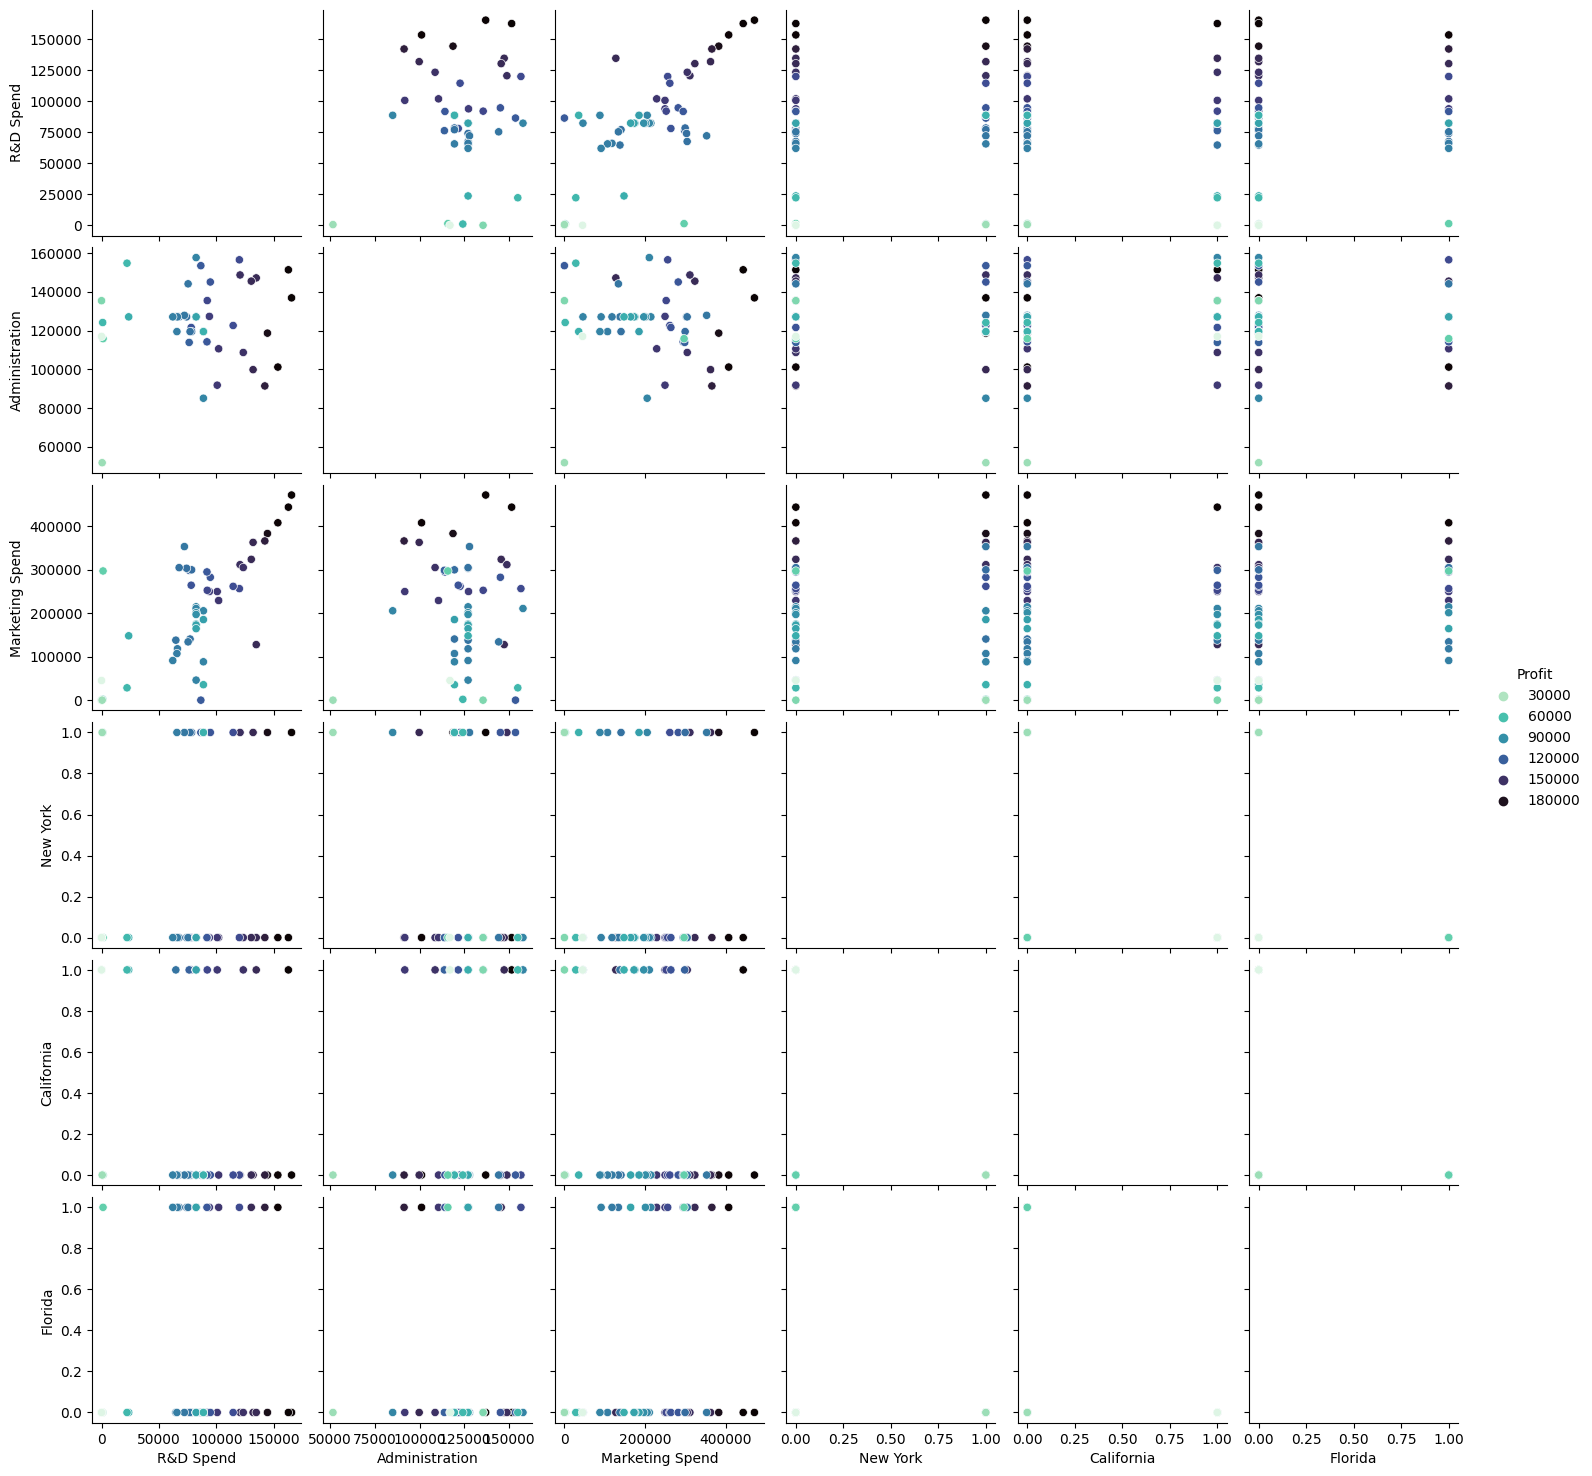

In [26]:
sns.pairplot(df_refined,hue='Profit',palette="mako_r")
plt.show()

### Data Spliting

In [27]:
x=df_refined.iloc[:,:-1].values
y=df_refined.iloc[:,-1].values

In [28]:
x

array([[1.65349200e+05, 1.36897800e+05, 4.71784100e+05, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.62597700e+05, 1.51377590e+05, 4.43898530e+05, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.53441510e+05, 1.01145550e+05, 4.07934540e+05, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.44372410e+05, 1.18671850e+05, 3.83199620e+05, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.42107340e+05, 9.13917700e+04, 3.66168420e+05, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.31876900e+05, 9.98147100e+04, 3.62861360e+05, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.34615460e+05, 1.47198870e+05, 1.27716820e+05, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.30298130e+05, 1.45530060e+05, 3.23876680e+05, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.20542520e+05, 1.48718950e+05, 3.11613290e+05, 1.00000000e+00,
        0.00000000e+00, 

In [29]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=69)

### Feature Extraction

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()
x_train[:,:-3]=sc.fit_transform(x_train[:,:-3])
x_test[:,:-3]=sc.transform(x_test[:,:-3])

In [34]:
x_test

array([[ 1.51713564, -1.71845583,  1.35829683,  0.        ,  0.        ,
         1.        ],
       [-0.02502366,  2.00490341, -0.01361113,  0.        ,  1.        ,
         0.        ],
       [ 0.48071099, -0.64010151,  0.14853477,  0.        ,  0.        ,
         1.        ],
       [ 0.08120815,  1.77017597, -1.87493317,  1.        ,  0.        ,
         0.        ],
       [ 0.96107836,  1.50089204,  0.87658057,  1.        ,  0.        ,
         0.        ],
       [ 2.04548756,  1.65019447,  2.04464582,  0.        ,  1.        ,
         0.        ],
       [ 0.21863035, -0.43896351,  0.72917671,  0.        ,  0.        ,
         1.        ],
       [-2.14715748,  0.75444562, -1.87493317,  0.        ,  1.        ,
         0.        ],
       [-0.02502366,  0.28557135, -0.34916493,  0.        ,  1.        ,
         0.        ],
       [-1.57529581,  1.84273307, -1.62474046,  0.        ,  1.        ,
         0.        ]])

## Step 2 - Models

In [35]:
from sklearn.metrics import r2_score
models_score={}

### Model 1 - Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[166187.94      , 166780.38594413],
       [ 96712.8       , 112515.53221779],
       [146121.95      , 125052.1956009 ],
       [122776.86      ,  90637.37953088],
       [152211.77      , 144057.21525625],
       [191792.06      , 191970.86668887],
       [124266.9       , 123786.03132066],
       [ 42559.73      ,  33815.85589372],
       [ 78239.91      , 109150.55268806],
       [ 65200.33      ,  52327.84514692]])

In [39]:
score=r2_score(y_test,y_pred)
score

0.8526439123769473

In [40]:
models_score['Linear Regression']=score

### Model 2 - Polynomial Linear Regression [Degree 2-10]

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly_linear_score=[]
for i in range(2,11):
  poly=PolynomialFeatures(degree=i)
  regressor.fit(poly.fit_transform(x_train),y_train)
  y_pred=regressor.predict(poly.fit_transform(x_test))
  score=r2_score(y_test, y_pred)
  poly_linear_score.append(score)
  print(f'[INFO] Degree {i:2d}th Polynomial Linear Regression score {score:6f}')

[INFO] Degree  2th Polynomial Linear Regression score 0.632534
[INFO] Degree  3th Polynomial Linear Regression score -1705.271075
[INFO] Degree  4th Polynomial Linear Regression score -93.634123
[INFO] Degree  5th Polynomial Linear Regression score -77.761546
[INFO] Degree  6th Polynomial Linear Regression score -68.128659
[INFO] Degree  7th Polynomial Linear Regression score -207.205492
[INFO] Degree  8th Polynomial Linear Regression score -203.765322
[INFO] Degree  9th Polynomial Linear Regression score -1047.307109
[INFO] Degree 10th Polynomial Linear Regression score -1819.398198


In [43]:
max_value,max_index= max((value, index) for index, value in enumerate(poly_linear_score))
models_score[f'Poly Linear Regression({max_index+2} degree)']=max_value

### Model 3 - Support Vector Regression (SVR)

In [44]:
from sklearn.svm import SVR

In [45]:
regressor=SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR()

In [46]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[166187.94      , 106574.84504377],
       [ 96712.8       , 106572.63485674],
       [146121.95      , 106572.66489287],
       [122776.86      , 106570.14231227],
       [152211.77      , 106575.39447444],
       [191792.06      , 106574.03735237],
       [124266.9       , 106574.15977049],
       [ 42559.73      , 106569.01830375],
       [ 78239.91      , 106570.73780092],
       [ 65200.33      , 106570.01597456]])

In [47]:
score=r2_score(y_test,y_pred)
score

-0.07126806636539729

In [48]:
models_score['Support Vector Regression']=score

### Model 4 - Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
regressor=DecisionTreeRegressor(random_state=69)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=69)

In [51]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[166187.94, 182901.99],
       [ 96712.8 ,  96778.92],
       [146121.95, 144259.4 ],
       [122776.86,  69758.98],
       [152211.77, 125370.37],
       [191792.06, 192261.83],
       [124266.9 , 125370.37],
       [ 42559.73,  14681.4 ],
       [ 78239.91,  81005.76],
       [ 65200.33,  64926.08]])

In [52]:
score=r2_score(y_test,y_pred)
score

0.7733727462417913

In [53]:
models_score['Decision Tree Regression']=score

### Model 5 - Random Forest Regression (Ensemble)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor=RandomForestRegressor(random_state=69)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=69)

In [56]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[166187.94  , 170749.9898],
       [ 96712.8   ,  93930.2326],
       [146121.95  , 138307.0197],
       [122776.86  ,  77325.2026],
       [152211.77  , 135666.5735],
       [191792.06  , 188268.3726],
       [124266.9   , 129980.5212],
       [ 42559.73  ,  39191.2545],
       [ 78239.91  ,  82728.074 ],
       [ 65200.33  ,  62869.9073]])

In [57]:
score=r2_score(y_test,y_pred)
score

0.8762957433600698

In [58]:
models_score['Random Forest Regression']=score

### Model 6 - Artificial Neural Network (ANN)

In [59]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [60]:
score_ann={}
for i in range(1,7):
  for j in range(1,i+1):
    print(f'[INFO] Hidden Layers: {i}th nodes -> {j}th nodes.')
    ann=tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=i,activation='relu'))
    ann.add(tf.keras.layers.Dense(units=j,activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1))
    ann.compile(optimizer='adam',loss='mean_squared_error')
    ann.fit(x_train,y_train,epochs=10)
    y_pred=ann.predict(x_test)
    score=r2_score(y_test,y_pred)
    score_ann[f'{i} {j}']=score
    print(f'Score: {score}')
    print('\n\n')

[INFO] Hidden Layers: 1th nodes -> 1th nodes.
Epoch 1/10
2/2 [==============================] - 1s 13ms/step - loss: 13649250304.0000
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 13649250304.0000
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 13649250304.0000
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 13649250304.0000
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 13649248256.0000
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 13649248256.0000
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 13649246208.0000
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 13649247232.0000
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 13649247232.0000
Epoch 10/10
1/1 [==============================] - 0s 147ms/step
Score: -6.929831574692172



[INFO] Hidden Layers: 2th nodes -> 1th nodes.
Epoch 1/10
2/2 [==============

1/1 [==============================] - 0s 57ms/step
Score: -6.929929027494304



[INFO] Hidden Layers: 3th nodes -> 3th nodes.
Epoch 1/10
2/2 [==============================] - 1s 10ms/step - loss: 13649334272.0000
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 13649332224.0000
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 13649329152.0000
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 13649325056.0000
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 13649321984.0000
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 13649319936.0000
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 13649316864.0000
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 13649314816.0000
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 13649311744.0000
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 13649307648.0000


1/1 [==============================] - 0s 56ms/step
Score: -6.929909840607118



[INFO] Hidden Layers: 4th nodes -> 1th nodes.
Epoch 1/10
2/2 [==============================] - 1s 6ms/step - loss: 13649251328.0000
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 13649251328.0000
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 13649250304.0000
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 13649250304.0000
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 13649249280.0000
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 13649248256.0000
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 13649246208.0000
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 13649248256.0000
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 13649246208.0000
Epoch 10/10
1/1 [==============================] - 0s 57ms/step
Score: -6.92983156294784



In [61]:
score_ann

{'1 1': -6.929831574692172,
 '2 1': -6.929863987695816,
 '2 2': -6.929857933092136,
 '3 1': -6.929831396435066,
 '3 2': -6.929929027494304,
 '3 3': -6.929909840607118,
 '4 1': -6.92983156294784,
 '4 2': -6.929807567577626,
 '4 3': -6.929799040502299,
 '4 4': -6.929796292267993,
 '5 1': -6.929800503454479,
 '5 2': -6.929855564767558,
 '5 3': -6.929791764517839,
 '5 4': -6.929796197623924,
 '5 5': -6.929824820228083,
 '6 1': -6.929864332694661,
 '6 2': -6.929817239186852,
 '6 3': -6.929746442157924,
 '6 4': -6.929821114933005,
 '6 5': -6.929869398918606,
 '6 6': -6.929675431879489}

In [62]:
max_key=max(score_ann,key=lambda x:score_ann[x])
models_score[f"ANN(Hidden nodes:{max_key})"]=score_ann[max_key]

## Step 3 - Analysing Best Model

In [63]:
models_score

{'Linear Regression': 0.8526439123769473,
 'Poly Linear Regression(2 degree)': 0.6325337291521864,
 'Support Vector Regression': -0.07126806636539729,
 'Decision Tree Regression': 0.7733727462417913,
 'Random Forest Regression': 0.8762957433600698,
 'ANN(Hidden nodes:6 6)': -6.929675431879489}

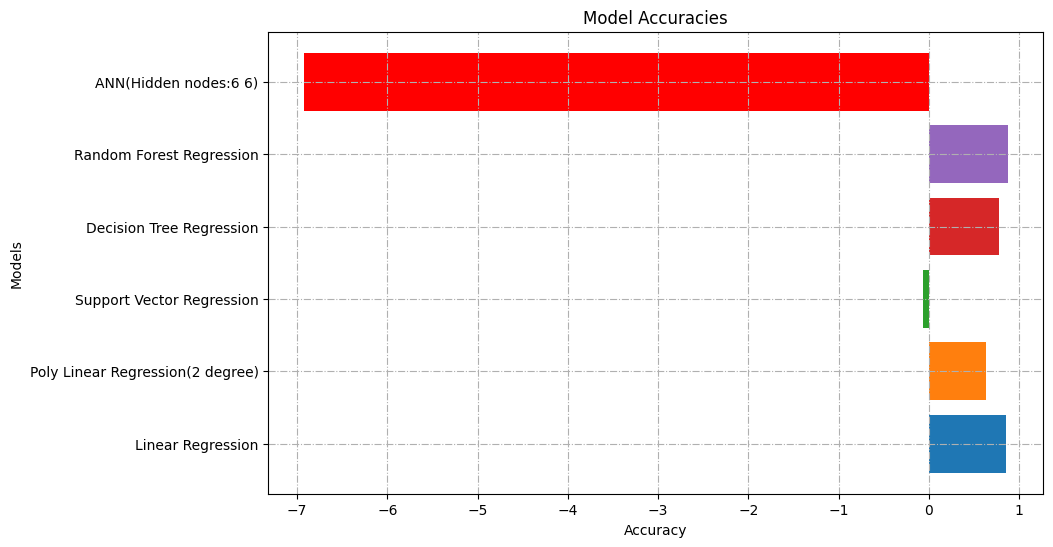

In [64]:
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','r']
plt.barh(list(models_score.keys()),list(models_score.values()),color=colors)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.grid(True, linestyle='-.')
plt.show()

In [65]:
#removing ANN for better Analysis
for i in models_score.keys():
  if 'ANN' in i:
    del models_score[i]
    break
models_score

{'Linear Regression': 0.8526439123769473,
 'Poly Linear Regression(2 degree)': 0.6325337291521864,
 'Support Vector Regression': -0.07126806636539729,
 'Decision Tree Regression': 0.7733727462417913,
 'Random Forest Regression': 0.8762957433600698}

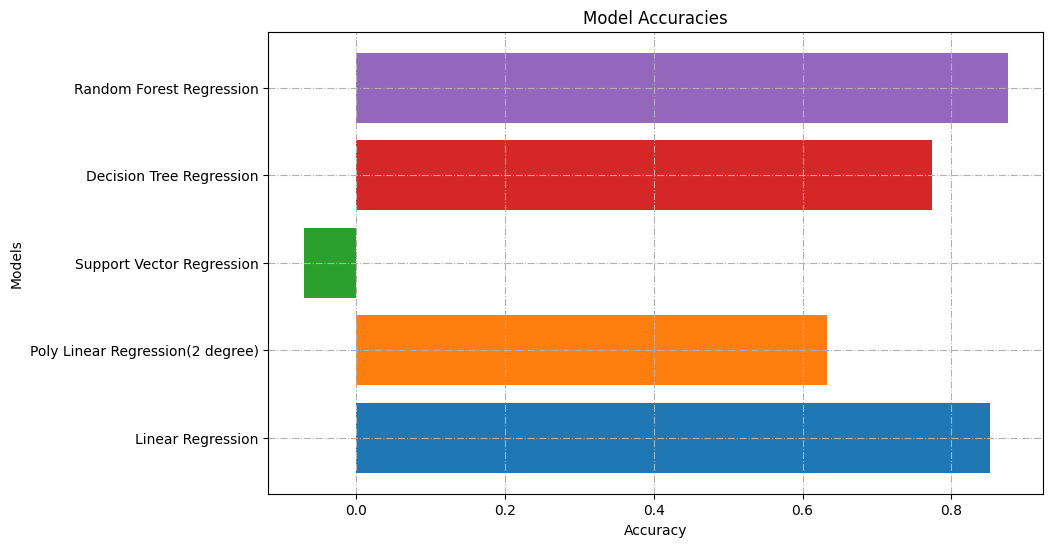

In [66]:
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.barh(list(models_score.keys()),list(models_score.values()),color=colors)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.grid(True, linestyle='-.')
plt.show()

Best Model Fit for Dataset:
1. Random Forest
2. Linear Regression
3. Decision Tree
4. Polynomial Linear Regression [Best: 2nd Degree]
5. Support Vector Regression (-ve r2 score)
6. ANN [Best: 5 and 2 nodes in hidden Layer] (-ve r2 score)

Best Regrads,<br>
Lakshya Sharma